# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [6]:
df.shape

(100, 6)

In [7]:
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.value_counts()

user_id  group      landing_page  time_spent_on_the_page  converted  language_preferred
546443   treatment  new           8.73                    no         English               1
546556   control    old           3.52                    yes        English               1
546566   control    old           8.35                    no         French                1
546565   control    old           8.02                    no         French                1
546564   control    old           0.91                    no         French                1
                                                                                          ..
546473   treatment  new           10.50                   yes        English               1
546472   treatment  new           7.07                    yes        Spanish               1
546471   treatment  new           7.81                    yes        French                1
546470   treatment  new           6.01                    yes        French

In [9]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [10]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []


#### Observations

- There are 100 rows or observations in the dataset.

- The "user_id" column represents the unique identifier for each user. There are 100 unique users in the dataset.

- The "group" column indicates the group to which each user belongs, with two categories: control and treatment. There are 50 users in each group.
- The "landing_page" column shows the type of landing page each user was assigned to, with two options: old and new. There are 50 users assigned to each landing page version.
- The "time_spent_on_the_page" column represents the time spent by users on the landing page. The average time spent is 5.3778 units, with a standard deviation of 2.378166. The minimum time spent is 0.19 units, while the maximum is 10.71 units.
- The "converted" column indicates whether or not each user was converted, with two options: yes and no. There are 54 users who were converted and 46 users who were not.
- The "language_preferred" column represents the preferred language of each user, with three options: Spanish, English, and another language. The majority of users (34 out of 100) prefer Spanish as their language.
- There are no missing values and no duplication in data.

### Univariate Analysis

#### Converted

In [11]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

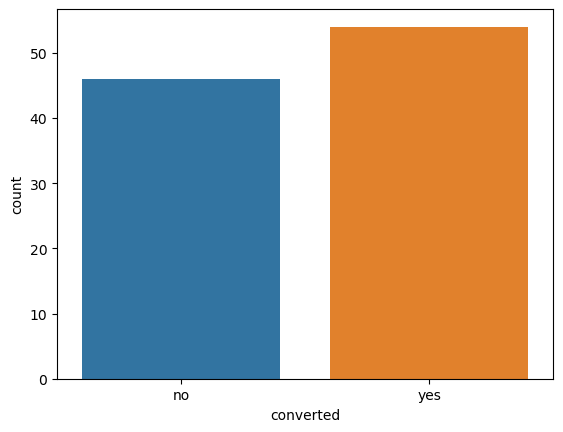

In [12]:
sns.countplot(data=df,x='converted')
plt.show()

#### Observation

- The "converted" column indicates whether or not each user was converted, with two options: yes and no. There are 54 users who were converted and 46 users who were not.

#### Language Preferred

In [13]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

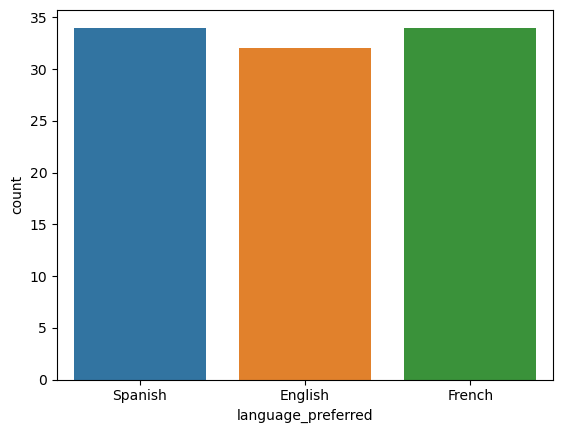

In [14]:
sns.countplot(data=df,x='language_preferred')
plt.show()

####  Observations

Among the users in the dataset, their preferred language is distributed as follows:

- 34 users prefer Spanish
- 34 users prefer French
- 32 users prefer English

This indicates that there is an equal preference for Spanish and French languages, while English is slightly less preferred among the users.

#### Time spent on the page

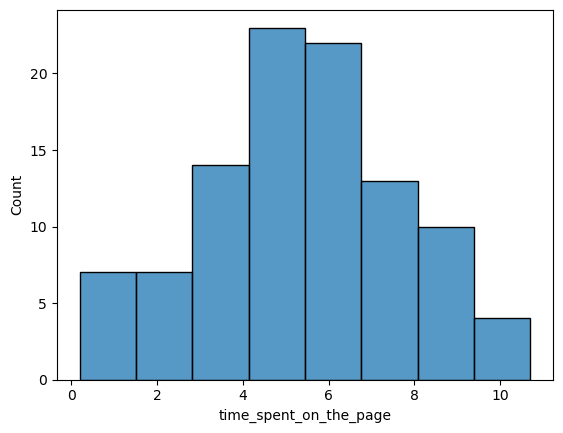

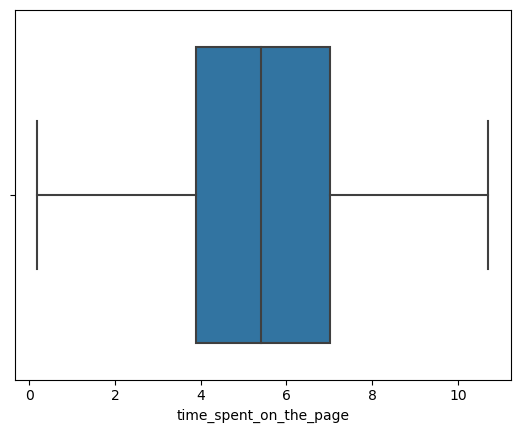

In [40]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
##plt.show()

#### Observations:

- The "time_spent_on_the_page" column represents the time spent by users on the landing page. The average time spent is 5.3778 units, with a standard deviation of 2.378166. The minimum time spent is 0.19 units, while the maximum is 10.71 units.
- There are no outliers in this dataset.

#### Group

In [16]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

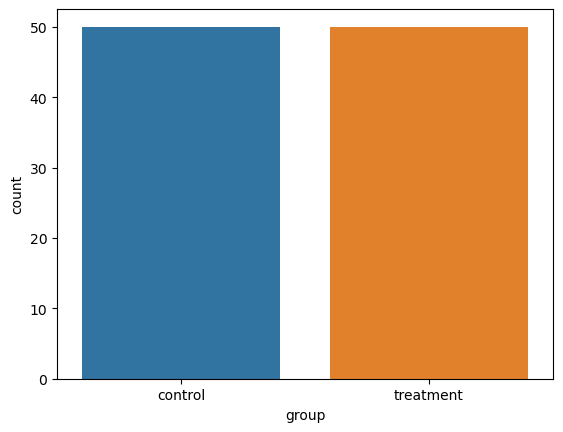

In [17]:
sns.countplot(data=df,x='group')
plt.show()

#### Observations:

- The "group" column indicates the group to which each user belongs, with two categories: control and treatment. There are 50 users in each group.

#### Landing page

In [18]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

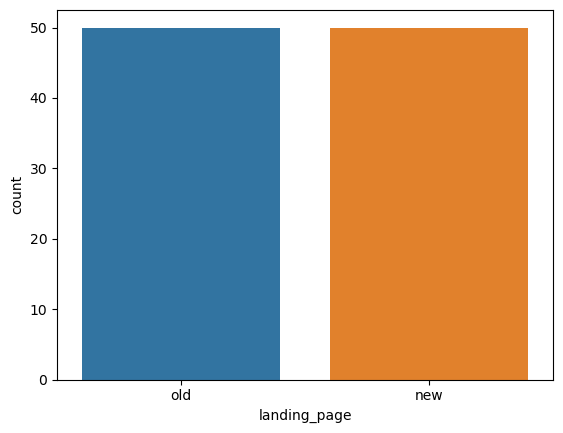

In [19]:
sns.countplot(data=df,x='landing_page')
plt.show()

### Bivariate Analysis

#### Conversion status vs Time spent on the page

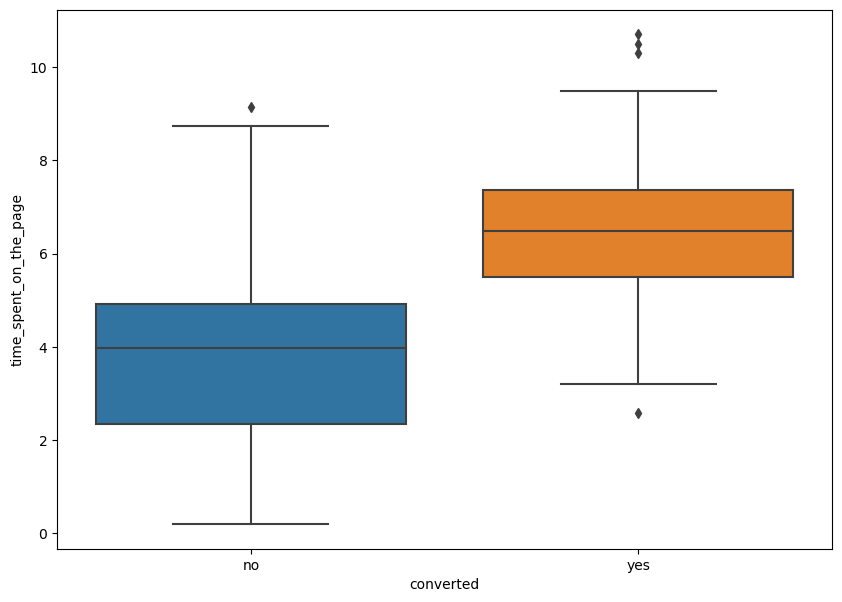

In [20]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = df, x ='converted' , y ='time_spent_on_the_page' )
plt.show()

#### Landing page vs Time spent on the page

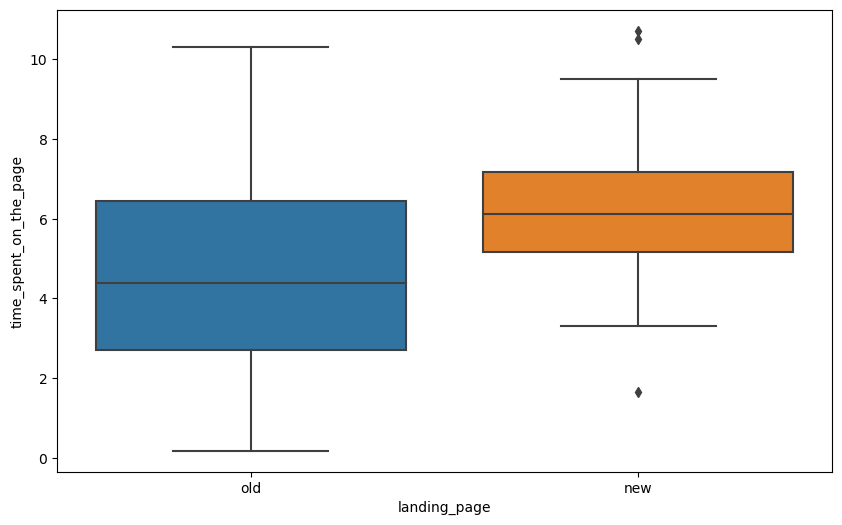

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

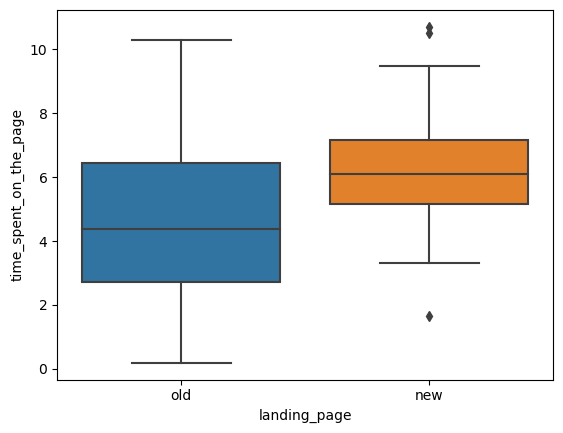

In [22]:
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0$: The mean time spent on the new landing page is equal to or less than the mean time spent on the existing landing page.

$H_a$:  The mean time spent on the new landing page is greater than the mean time spent on the existing landing page.



### Step 2: Select Appropriate test

Based on the given information, the appropriate test for comparing the means of two independent populations with unknown population standard deviations in a one-tailed test is Two Sample T-test,

### Step 3: Decide the significance level

The significance level will be **0.05**

### Step 4: Collect and prepare data

In [23]:

time_spent_old_page = df[df['landing_page'] == 'old']['time_spent_on_the_page']
time_spent_new_page = df[df['landing_page'] == 'new']['time_spent_on_the_page']


print('The mean the time spent on the old page is ' , round(time_spent_old_page.mean(),2))
print('The mean time spent on the new page is ' ,round(time_spent_new_page.mean(),2))
print('The standard deviation of the time spent on the old page is ',round(time_spent_old_page.std(),2))
print('The standard deviation of the time spent on the new page is ' ,round(time_spent_new_page.std(),2))
                                                                    

The mean the time spent on the old page is  4.53
The mean time spent on the new page is  6.22
The standard deviation of the time spent on the old page is  2.58
The standard deviation of the time spent on the new page is  1.82


### Step 5: Calculate the p-value

In [24]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(time_spent_old_page, time_spent_new_page, equal_var = False, alternative='greater')
print('The p-value is', p_value)

The p-value is 0.9998607618774834


### Step 6: Compare the p-value with $\alpha$

In [25]:
if p_value < 0.05:
    print(f'the p-value {p_value} is less than the significance level, we reject the null hypothesis.')
else:
    print(f'the p-value {p_value} is greater than the significance level, we fail to reject the null hypothesis.')

the p-value 0.9998607618774834 is greater than the significance level, we fail to reject the null hypothesis.


### Step 7:  Draw inference

- we have conducted a Two Sample T-test, to compare the mean time spent on the new landing page with the mean time spent on the existing landing page.
- There is not enough evidence to conclude that the mean time spent on the new landing page is greater than the mean time spent on the existing landing page.
- Users do not spend significantly more time on the new landing page compared to the existing landing page, based on the available data.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

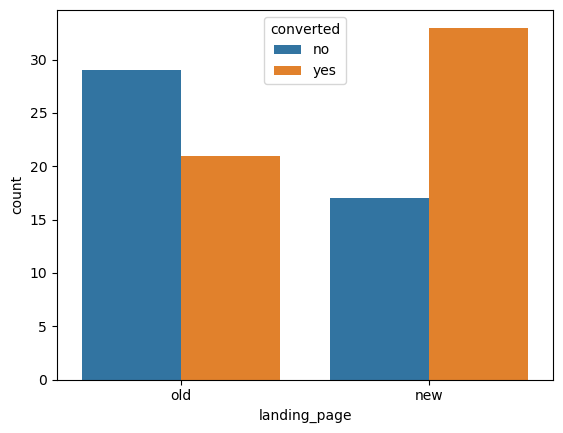

In [26]:
sns.countplot(data=df, x='landing_page',hue='converted');

### Step 1: Define the null and alternate hypotheses

$H_0$: The conversion rate for the new page is less than or equal to the conversion rate for the old page.


$H_a$: The conversion rate for the new page is greater than the conversion rate for the old page.



### Step 2: Select Appropriate test

Based on the given information, the appropriate test for comparing the means of two independent populations with unknown population standard deviations in a one-tailed test is Two Proportion Z-Test.

### Step 3: Decide the significance level

The significance level will be **0.05**

### Step 4: Collect and prepare data

In [27]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == "control"]['converted'].value_counts()['yes'] 

n_control = df.group.value_counts()['control'] 
n_treatment = df.group.value_counts()['treatment'] 

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [28]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger') 

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [29]:
if p_value < 0.05:
    print(f'the p-value {p_value} is less than the significance level, we reject the null hypothesis.')
else:
    print(f'the p-value {p_value} is greater than the significance level, we fail to reject the null hypothesis.')

the p-value 0.008026308204056278 is less than the significance level, we reject the null hypothesis.


### Step 7:  Draw inference

Based on the given information and conducting a Two Proportion Z-Test, the p-value of 0.008026308204056278 is less than the significance level of 0.05. Therefore, we reject the null hypothesis that the conversion rate for the new page is less than or equal to the conversion rate for the old page.

This provides evidence to support the alternative hypothesis that the conversion rate for the new page is greater than the conversion rate for the old page. It suggests that the new landing page has a higher likelihood of converting users compared to the old landing page.

In conclusion, based on the statistical analysis, there is sufficient evidence to suggest that the conversion rate for the new page is higher than the conversion rate for the old page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

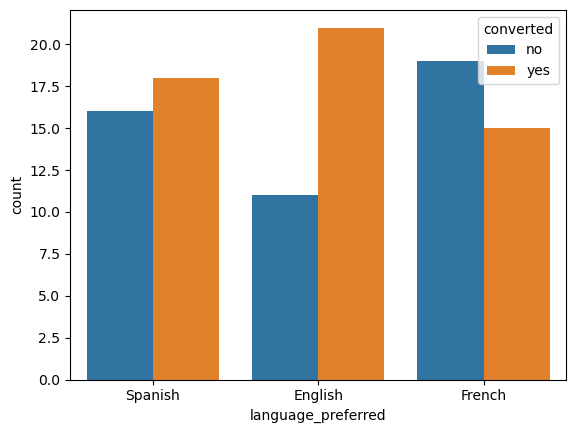

In [30]:
sns.countplot(data=df, x='language_preferred',hue='converted');

### Step 1: Define the null and alternate hypotheses

$H_0$: The conversion and preferred language are independent.

$H_a$: The conversion and preferred language are related.

### Step 2: Select Appropriate test

To determine if the conversion and preferred language are independent or related, we can conduct a test of independence using the Chi-square test.

### Step 3: Decide the significance level

The significance level will be **0.05**

### Step 4: Collect and prepare data

In [31]:
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])  

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [32]:
from scipy.stats import chi2_contingency
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [33]:
if p_value < 0.05:
    print(f'the p-value {p_value} is less than the significance level, we reject the null hypothesis.')
else:
    print(f'the p-value {p_value} is greater than the significance level, we fail to reject the null hypothesis.')

the p-value 0.2129888748754345 is greater than the significance level, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Based on the given data and conducting a Chi-square test of independence with a significance level of 0.05, we obtained a p-value of 0.2129888748754345.

Since the p-value (0.2129888748754345) is greater than the significance level (0.05), we fail to reject the null hypothesis. Therefore, we do not have enough evidence to conclude that there is a relationship between the conversion and preferred language variables.

In other words, the data does not provide sufficient evidence to suggest that the conversion and preferred language are related.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [34]:
df_new_page=df[df['landing_page']=='new']

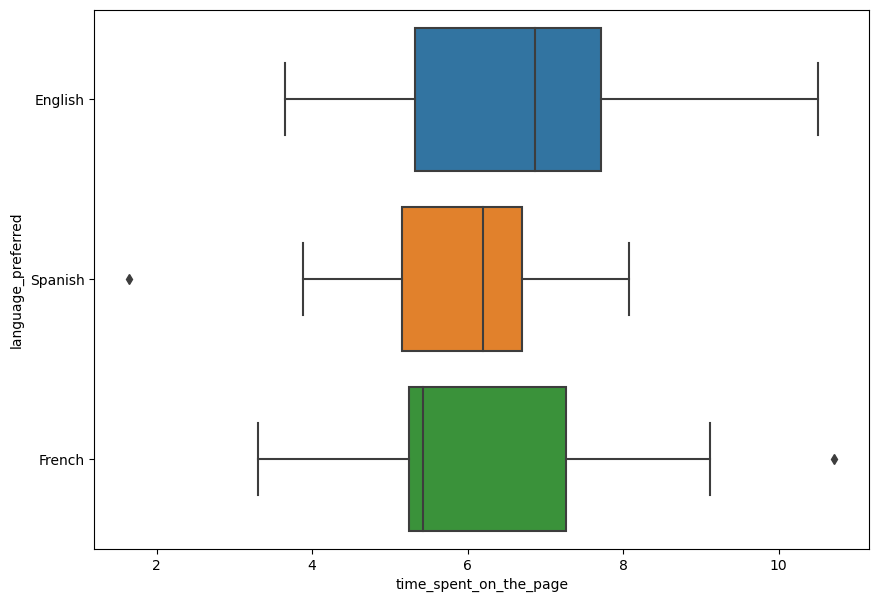

In [35]:
plt.figure(figsize=(10,7))
sns.boxplot(data = df_new_page,x = 'time_spent_on_the_page', y = 'language_preferred')
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0$: The time spent on the new page is the same for different language users.

$H_a$: The time spent on the new page differs for different language users.

### Step 2: Select Appropriate test

To test if the time spent on the new page is the same for different language users, we can use the analysis of variance (ANOVA) test. ANOVA is suitable for comparing the means of more than two groups, in this case, the different language users.

### Step 3: Decide the significance level

The significance level will be **0.05**

### Step 4: Collect and prepare data

In [36]:
time_English = df_new_page[df_new_page['language_preferred'] == 'English']['time_spent_on_the_page']
time_French = df_new_page[df_new_page['language_preferred'] == 'French']['time_spent_on_the_page']
time_Spanish = df_new_page[df_new_page['language_preferred'] == 'Spanish']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [37]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(time_English,time_French,time_Spanish)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [38]:
if p_value < 0.05:
    print(f'the p-value {p_value} is less than the significance level, we reject the null hypothesis.')
else:
    print(f'the p-value {p_value} is greater than the significance level, we fail to reject the null hypothesis.')

the p-value 0.43204138694325955 is greater than the significance level, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Based on the p-value of 0.43204138694325955, which is greater than the significance level of 0.05, we fail to reject the null hypothesis. Therefore, we do not have enough evidence to conclude that the time spent on the new page differs for different language users. This suggests that the time spent on the new page may be similar across different language users.

## Conclusion and Business Recommendations

##### Conclusion:

Based on the statistical analysis conducted on the data from the A/B testing, the following conclusions can be drawn:

- Users do not spend significantly more time on the new landing page compared to the existing landing page. The mean time spent on the new landing page is not greater than the mean time spent on the existing landing page.

- The conversion rate for the new landing page is higher than the conversion rate for the old landing page. This indicates that the new landing page has a higher likelihood of converting users into subscribers compared to the old landing page.

- There is no significant relationship between the conversion rate and the preferred language of the users. The preferred language does not appear to have an impact on the conversion rate.

- The time spent on the new landing page is similar across different language users. There is no significant difference in the time spent on the new landing page based on the preferred language.

##### Business Recommendations:

- Improve the user engagement on the new landing page: Although the new landing page has a higher conversion rate, it is important to focus on increasing the time users spend on the page. Enhance the content, layout, and interactive elements to make it more engaging and compelling for users.

- Optimize the existing landing page: Since the conversion rate for the old landing page is lower than the new landing page, it might be worth analyzing the reasons behind this. Identify the areas of improvement in the existing landing page and make necessary changes to enhance its effectiveness in converting users.

- Collect additional data on user preferences: While the preferred language does not seem to have a significant impact on conversion, it would be beneficial to gather more data on user preferences and behaviors. This can provide deeper insights into user segmentation and help tailor the landing page content and features to specific user groups.

- Continuously test and iterate: A/B testing is a powerful tool for evaluating the effectiveness of different variations. The company should continue to conduct experiments and iterate on the landing page design, content, and user experience. This iterative approach will allow for continuous improvement and optimization of the landing page to maximize new subscriber acquisition.

- Monitor and analyze user feedback: Alongside quantitative analysis, it is crucial to gather qualitative feedback from users. Implement feedback mechanisms such as surveys, feedback forms, or user interviews to understand their preferences, pain points, and suggestions. This qualitative data can complement the quantitative analysis and provide valuable insights for further optimization.

By implementing these recommendations, E-news Express can increase user engagement, improve conversion rates, and ultimately acquire more new subscribers for its online news portal.








___